# Data Science & Business Analytics Tasks
<font size=6>
    BY - SAGNICK BHAR


<font color='blue'>
<font size=4>

## Unsupervised Machine Learning - Clustering(Iris DataSet)


## Overview of the Problem set ##

**Problem Statement**: 
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

## Importing Packages ##

First, let's import all the packages that will be needed during this assignment. 

In [32]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
# Loading the iris dataset
df = datasets.load_iris()
print('Data Successfully Imported')
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head() # See the first 5 rows

Data Successfully Imported


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
# To know number of rows and collumns
df.shape

(150, 4)

In [35]:
# To find if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [36]:
# To see summary statistics such as the percentiles, mean, std, max, count of the given dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


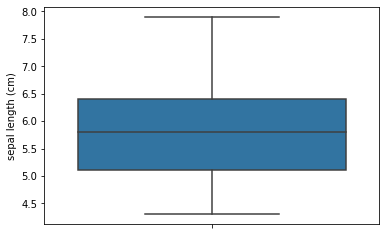

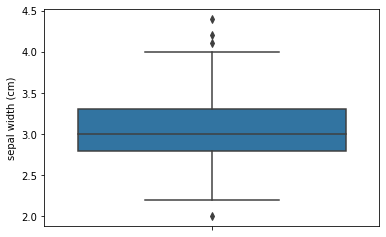

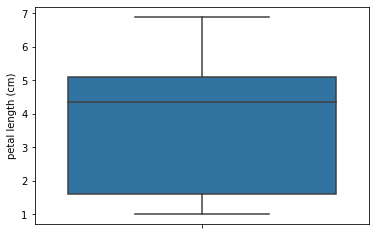

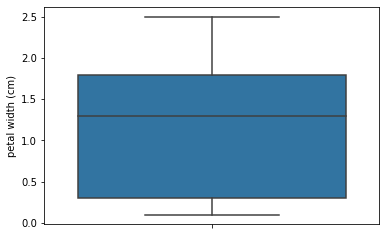

In [37]:
# To find outliers
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

- From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'

In [38]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 4)

- After removing the outliers, the number of rows are reduced to 146 from 150

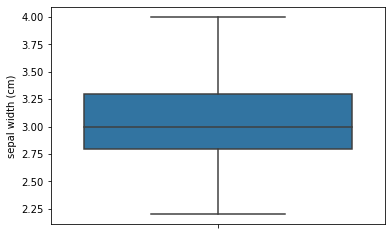

In [39]:
# Blocplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [40]:
# Standardizing to avoid bias
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)

In [41]:
#To find the optimal no. of cluster
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

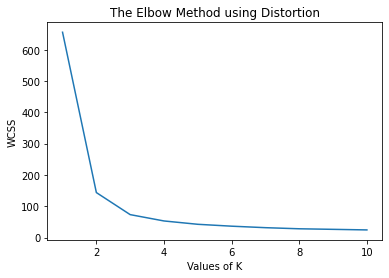

In [42]:
#Ploting elbow curve or sree to find the no. of cluster
plt.plot(range(1, 11), wcss)
plt.xlabel('Values of K') 
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.title('The Elbow Method using Distortion') 
plt.show() 

"The elbow method" got its name from the elbow pattern forming something like above. The optimal clusters are formed where the elbow occurs. This is when the WCSS(Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.

Here we choose the number of clusters as '3'.

## Creating K-Means Classifier ##


In [43]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualizing the cluster data ##


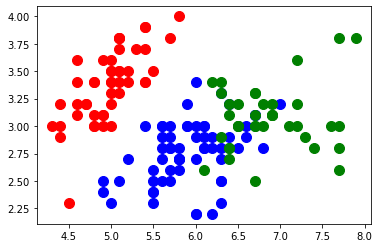

In [44]:

# Visualising the clusters 
# Preferably on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

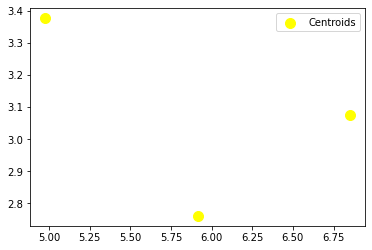

In [45]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Now Combining both the above graphs together ##


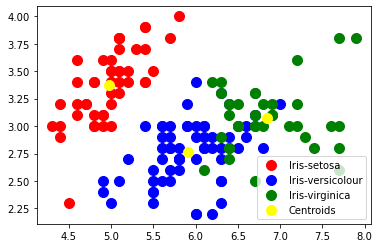

In [46]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## CONCLUSION ##
This concludes the application of K-Means Clustering Algorithm and the respective Graphical Representation of Clusters.
